# Anomalous energy exchanges and Wigner-function negativities in a single-qubit gate

In this notebook and the joint .py we provide the necessary functions to obtain the plots presented in the paper 10.1103/PhysRevA.107.023710.

In [1]:
from WeakValues import * # Load the library with all the necessary packages and functions

Plots_Path = '/Users/brunogoes/Dropbox/GitHub/ThesisSPI/Chapter3/PlotsChap3/'
Font_Size = 32 #default font size for my plots
number_colors = 50
colors = plt.cm.inferno(np.linspace(0.85,0.1,number_colors))

# Latex fonts in the plots
mpl.rc('font', family='serif') # set the font name for a font family
plt.rc('text', usetex=True)

hello world!


### Parameters

In [2]:
gamma = 1/8000 # Decay rate
tau = 600. # Time of interation
delta = 0. # Detuning to zero
Gamma = 0. # 

### Kets to build the density matrices

In [3]:
# Thermal equilibrium density matrix - pre-state
pre = basis(4,0) - basis(4,3) #Qobj([1.,0.,0.,-1.])
print(pre)

# Effect matrix in g - post-state in g
pos_g = pre 
print(pos_g)

# Effect matrix in e - post-state in e
pos_e = basis(4,0) + basis(4,3)
print(pos_e)

# Identity
ide = basis(4,0) 
print(ide)

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [-1.]]
Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [-1.]]
Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [1.]]
Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]


## Simulation. Analytical difference of excitations as a function of $\theta$

In [4]:
from WeakValues import tracemoins, traceJm

########################################################################################
#
#   Analytical difference of excitations as a function of time
#
########################################################################################

theta = 0.93*np.pi
Omega_number = theta/tau
delta_t = 10.
tlist =  np.arange(10**-3, tau + delta_t, delta_t)

func_ee = lambda t : -Omega_number*np.real(tracemoins(gamma, delta, Omega_number, Gamma, t, tau, pre, pos_e)) + gamma*traceJm(gamma, delta, Omega_number, Gamma, t, tau, pre, pos_e)
func_eg = lambda t : -Omega_number*np.real(tracemoins(gamma, delta, Omega_number, Gamma, t, tau, pre, pos_g)) + gamma*traceJm(gamma, delta, Omega_number, Gamma, t, tau, pre, pos_g)
func_ei = lambda t : -Omega_number*np.real(tracemoins(gamma, delta, Omega_number, Gamma, t, tau, pre, ide)) + gamma*traceJm(gamma, delta, Omega_number, Gamma, t, tau, pre, ide) 

numbE_of_t = []

numbG_of_t = []
    
numb_of_t = []

for y in tlist:
    aux_ee = quad(func_ee, 0, y)[0]
    aux_eg = quad(func_eg, 0, y)[0]
    aux_ei = quad(func_ei, 0, y)[0]
    
    numbE_of_t.append(aux_ee)
    numbG_of_t.append(aux_eg)
    numb_of_t.append(aux_ei)

## Plot. Weak values: number of excitations as a function of time

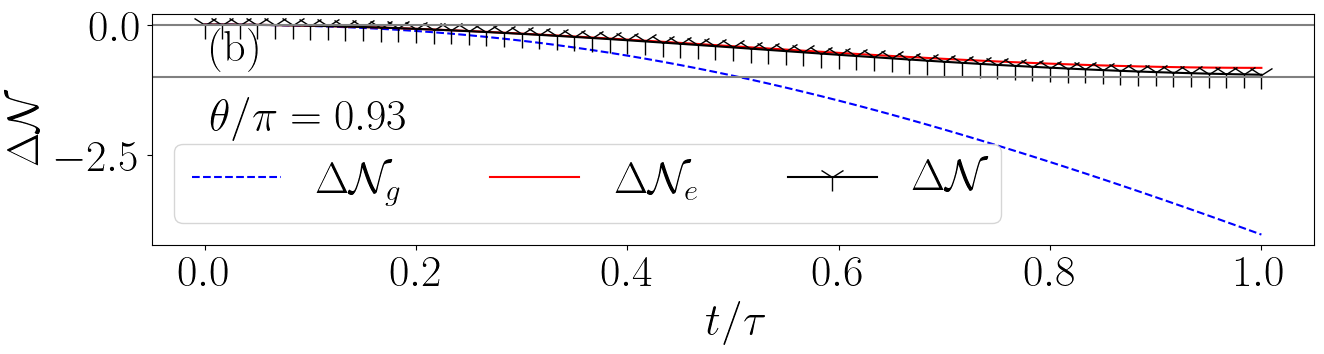

In [5]:
j = 1
# Initializing my figure and subplots: one row, one column with the size in inches.
fig, axs = plt.subplots(1, 1, figsize = (15,3))
gs = gridspec.GridSpec(1,1)

# Plots: normalized time, number of excitation, line aesthetics and label.
axs.plot(tlist/tau, numbG_of_t, '--', color = 'blue',label = r'$\Delta\mathcal{N}_g$')
axs.plot(tlist/tau, numbE_of_t, color = 'red', label = r'$\Delta\mathcal{N}_e$')
axs.plot(tlist/tau, numb_of_t, marker = "1", markersize = 20,color = 'black', label = r'$\Delta\mathcal{N}$')

# Axis identifiers and aesthetics.
axs.set_xlabel(r'$t/\tau$',fontsize = Font_Size)
axs.set_ylabel(r'$\Delta \mathcal{N}$',fontsize = Font_Size)
axs.tick_params(axis='x', labelsize=Font_Size)
axs.tick_params(axis='y', labelsize=Font_Size)

# Vertical lines showing the allowed range.
axs.axhline(0, color = 'gray')
axs.axhline(-1, color = 'gray')

# Chosen value of angle.
axs.annotate(r'$\theta/\pi = 0.93$', xy=(0.05,0.5), xycoords= 'axes fraction',fontsize=Font_Size)

# Identifiers: plot label and (b) and legend.
axs.annotate('('+alphabet[j]+')', xy=(0.05,0.8), xycoords= 'axes fraction',fontsize=Font_Size)    
axs.legend(fontsize= Font_Size, loc = 'lower left', ncol=3)

# Saving and visialization: I save in both .pdf and .svg. The second is suited to work with illustrator or Gravit Design.
plt.savefig(Plots_Path+'Fig1aa.pdf',bbox_inches='tight')
plt.savefig(Plots_Path+'Fig1aa.svg',bbox_inches='tight')
plt.show() 

## Simulation. Analytical difference of excitations as a function of theta

In [6]:
delta_theta = np.pi/70
theta_vec = np.arange(delta_theta, np.pi+2*delta_theta, delta_theta)

numbE = []
numbG = []
numb =[]

for theta in theta_vec:
    
    func1 = lambda t: -(theta/tau)*np.real(tracemoins(gamma, delta, theta/tau, Gamma, t, tau, pre, pos_e)) + gamma*traceJm(gamma, delta, theta/tau, Gamma, t, tau, pre, pos_e)
    aux1 = complex_quadrature(func1, 0, tau)
    numbE.append(np.real(aux1[0]))
    
    func2 = lambda t: -(theta/tau)*np.real(tracemoins(gamma, delta, theta/tau, Gamma, t, tau, pre, pos_g)) + gamma*traceJm(gamma, delta, theta/tau, Gamma, t, tau, pre, pos_g)
    aux2 = complex_quadrature(func2, 0, tau)
    numbG.append(np.real(aux2[0]))
    
    func3 = lambda t: -(theta/tau)*np.real(tracemoins(gamma, delta, theta/tau, Gamma, t, tau, pre, ide)) + gamma*traceJm(gamma, delta, theta/tau, Gamma, t, tau, pre, ide)
    aux3 = complex_quadrature(func3, 0, tau)
    numb.append(np.real(aux3[0]))

## Simulation. Weak values: Numerical difference of excitations as a function of theta

In [7]:
delta_theta = np.pi/70
theta_range = np.arange(delta_theta, np.pi+2*delta_theta, delta_theta) 

dataE_1ph = []
dataG_1ph = []

dataE_2ph = []
dataG_2ph = []


for theta in tqdm(theta_range):
    aux1 = NumberOfExcitations_Total(theta, tau, gamma, Gamma)
    aux2 = NumberOfExcitations_Total(theta, tau, gamma, Gamma, Two_photons = True)
    
    dataE_1ph.append(aux1[1])
    dataG_1ph.append(aux1[0])
    
    dataE_2ph.append(aux2[1])
    dataG_2ph.append(aux2[0])
    
Ng_omega0 = []
Ne_omega0 = []

for theta in tqdm(theta_range):
    
    [testg, teste] = NumberOfExcitations_CentralFrequency(theta, tau, gamma, Gamma)
    
    Ng_omega0.append(testg)
    Ne_omega0.append(teste)

100%|███████████████████████████████████████████| 71/71 [00:06<00:00, 10.93it/s]


# Main plot. Weak values: number of excitations as a function of $\theta$

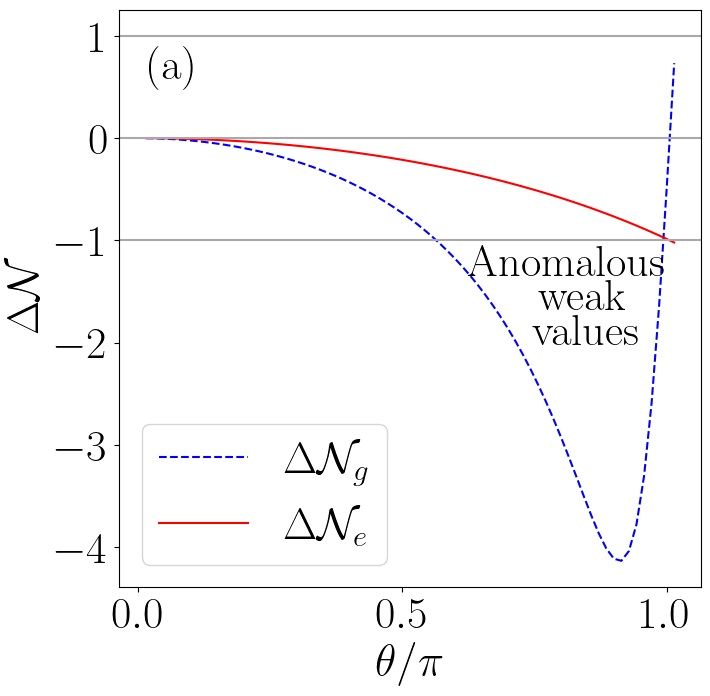

In [8]:
j = 0
fig, axs = plt.subplots(1, 1, figsize = (7.5,7.5))
gs = gridspec.GridSpec(1,1)

axs.plot(theta_range/np.pi, dataG_2ph,'--', color = 'blue',label = r'$\Delta\mathcal{N}_g$')
axs.plot(theta_range/np.pi, dataE_2ph, color = 'red', label = r'$\Delta\mathcal{N}_e$')


axs.annotate('('+alphabet[j]+')', xy=(0.05,0.88), xycoords= 'axes fraction',fontsize=Font_Size)
axs.set_xlabel(r'$\theta/\pi$',fontsize = Font_Size)
axs.set_ylabel(r'$\Delta \mathcal{N}$',fontsize = Font_Size)
axs.tick_params(axis='x', labelsize=Font_Size)
axs.tick_params(axis='y', labelsize=Font_Size)

axs.axhline(1, color = 'darkgray')
axs.axhline(0, color = 'darkgray')
axs.axhline(-1, color = 'darkgray')

axs.annotate('Anomalous', xy=(0.6,0.54), xycoords= 'axes fraction',fontsize=Font_Size)
axs.annotate(' weak', xy=(0.72,0.48), xycoords= 'axes fraction',fontsize=Font_Size)
axs.annotate('values', xy=(0.71,0.42), xycoords= 'axes fraction',fontsize=Font_Size)
    
axs.legend(fontsize= Font_Size, loc = 'lower left')

plt.savefig(Plots_Path+'Fig2a.pdf',bbox_inches='tight')
plt.savefig(Plots_Path+'Fig2a.svg',bbox_inches='tight')
plt.show() 

## Appendix plot. Weak values: number of excitations comparison for different number of photons truncation.

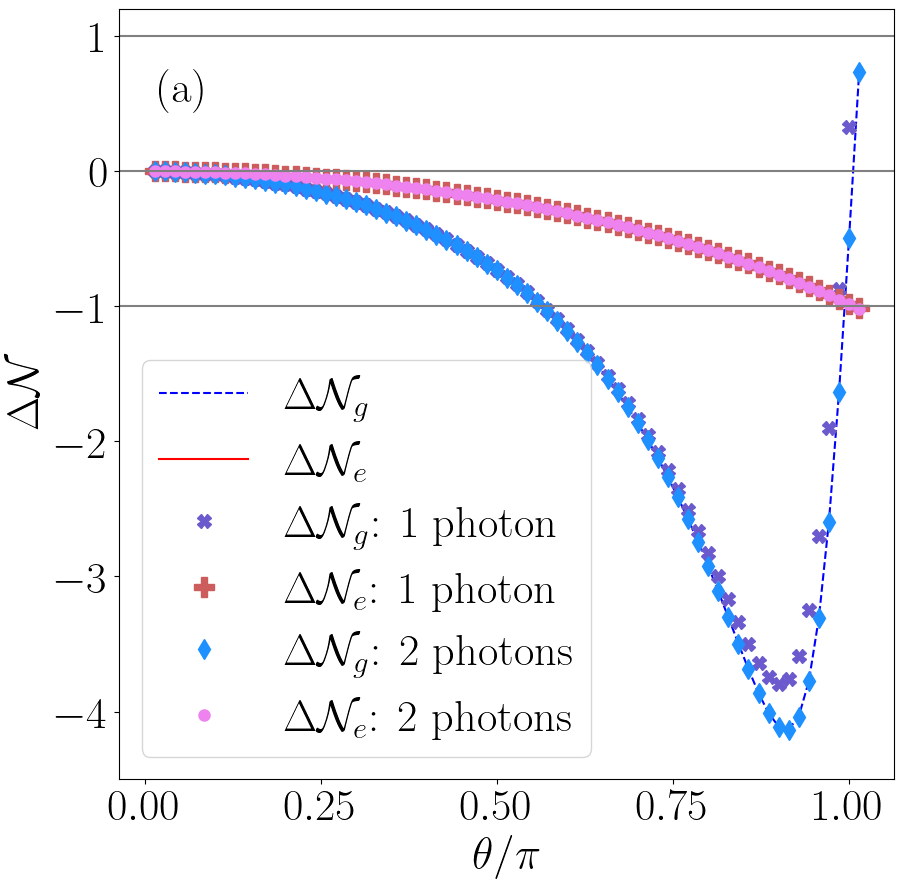

In [9]:
j = 0
fig, axs = plt.subplots(1, 1, figsize = (10,10))
gs = gridspec.GridSpec(1,1)

axs.plot(theta_vec/np.pi, numbG, '--', color = 'blue', label = r'$\Delta\mathcal{N}_g$')
axs.plot(theta_vec/np.pi, numbE, color = 'red', label = r'$\Delta\mathcal{N}_e$')

axs.plot(theta_range/np.pi, dataG_1ph, 'X', color = 'slateblue', markersize=10,  label = r'$\Delta\mathcal{N}_g$: 1 photon')
axs.plot(theta_range/np.pi, dataE_1ph, 'P', color = 'indianred', markersize=14, label = r'$\Delta\mathcal{N}_e$: 1 photon')

axs.plot(theta_range/np.pi, dataG_2ph,'d',color = 'dodgerblue', markersize=10,  label = r'$\Delta\mathcal{N}_g$: 2 photons')
axs.plot(theta_range/np.pi, dataE_2ph, 'o', color = 'violet', markersize=8, label = r'$\Delta\mathcal{N}_e$: 2 photons')


axs.annotate('('+alphabet[j]+')', xy=(0.05,0.88), xycoords= 'axes fraction',fontsize=Font_Size)
axs.set_xlabel(r'$\theta/\pi$',fontsize = Font_Size)
axs.set_ylabel(r'$\Delta \mathcal{N}$',fontsize = Font_Size)
axs.tick_params(axis='x', labelsize=Font_Size)
axs.tick_params(axis='y', labelsize=Font_Size)

axs.set_ylim(-4.5,1.2)
axs.axhline(1, color = 'gray')
axs.axhline(0, color = 'gray')
axs.axhline(-1, color = 'gray')


xauxlist = [-1 for i in theta_vec/np.pi]

axs.legend(fontsize= Font_Size, loc = 'lower left')

plt.savefig(Plots_Path+'Fig1aAppendix.pdf',bbox_inches='tight')
plt.savefig(Plots_Path+'Fig1aAppendix.svg',bbox_inches='tight')
plt.show() 

## Appendix Plot. Weak values: number of excitations comparison centered at the qubit's frequency $\omega_0$

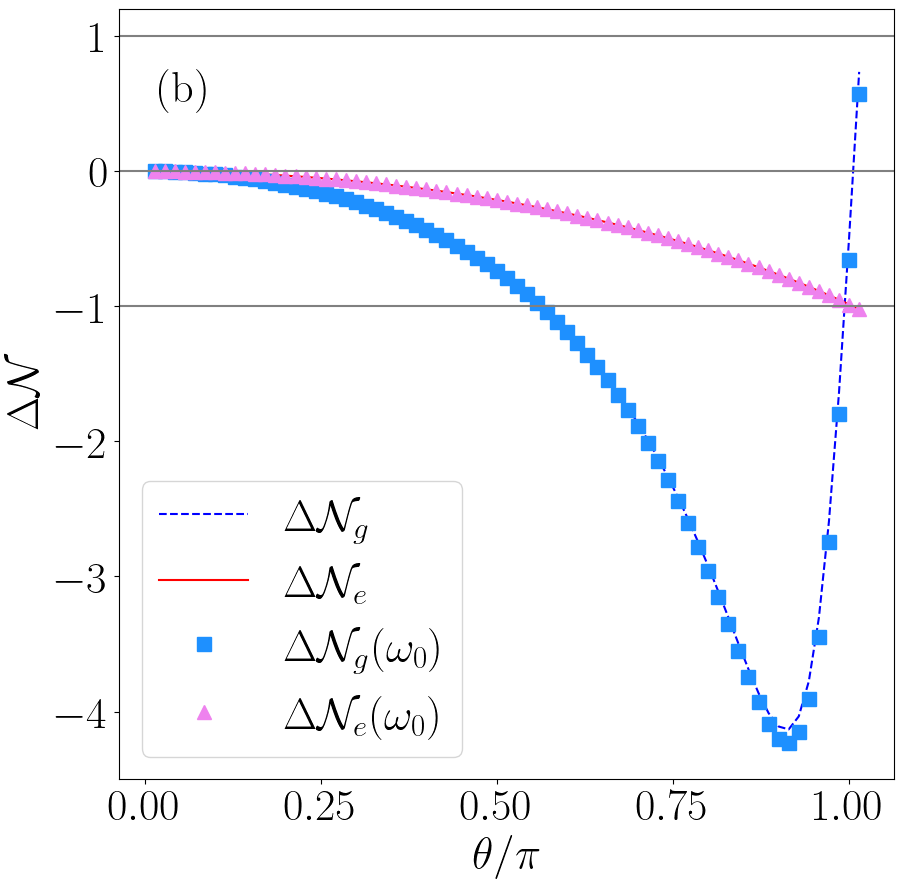

In [10]:
j = 1
fig, axs = plt.subplots(1, 1, figsize = (10,10))
gs = gridspec.GridSpec(1,1)

axs.plot(theta_vec/np.pi, numbG, '--', color = 'blue', label = r'$\Delta\mathcal{N}_g$')
axs.plot(theta_vec/np.pi, numbE, color = 'red',label = r'$\Delta\mathcal{N}_e$')

axs.plot(theta_range/np.pi, Ng_omega0, 's', color = 'dodgerblue', markersize=10, label = r'$\Delta{\cal N}_g(\omega_0)$')
axs.plot(theta_range/np.pi, Ne_omega0, "^", color = 'violet', markersize=10, label = r'$\Delta{\cal N}_e(\omega_0)$')

axs.annotate('('+alphabet[j]+')', xy=(0.05,0.88), xycoords= 'axes fraction',fontsize=Font_Size)
axs.set_xlabel(r'$\theta/\pi$',fontsize = Font_Size)
axs.set_ylabel(r'$\Delta \mathcal{N}$',fontsize = Font_Size)
axs.tick_params(axis='x', labelsize=Font_Size)
axs.tick_params(axis='y', labelsize=Font_Size)


axs.axhline(0, color = 'gray')
axs.axhline(1, color = 'gray')
axs.axhline(-1, color = 'gray')
axs.set_ylim(-4.5,1.2)
xauxlist = [-1 for i in theta_vec/np.pi]

axs.legend(fontsize= Font_Size, loc = 'lower left')

plt.savefig(Plots_Path+'Fig1bAppendix.pdf',bbox_inches='tight')
plt.savefig(Plots_Path+'Fig1bAppendix.svg',bbox_inches='tight')
plt.show() 

## Wigner function negativity

### Wigner function negativity with fixed densities

In [11]:
delta_theta = np.pi/70
theta_range = np.arange(delta_theta, np.pi+2*delta_theta, delta_theta) 

#The xy-range that the function will be ploted is: 
xvec = np.linspace(-3,3,200)
dxdy = (xvec[1] - xvec[0])**2
# # Make the meshgrid
X, Y = np.meshgrid(xvec, xvec)

WignerNegativityG_Usual = []
WignerNegativityE_Usual = []

WignerNegativityG_Modified = []
WignerNegativityE_Modified = []

dxdy =(xvec[1] - xvec[0])**2 

for theta in tqdm(theta_range):
    
    [Zg, Ze] = Wf_g_and_e2_FixedDensities(theta, X, Y, tau, gamma, Gamma)
    
    computeforG_Usual = sum(dxdy*abs(Zg))-1
    computeforE_Usual = sum(dxdy*abs(Ze))-1
    
    computeforG_Modified = sum(dxdy*abs(Zg))-sum(dxdy*Zg)
    computeforE_Modified = sum(dxdy*abs(Ze))-sum(dxdy*Ze)
    
    WignerNegativityG_Usual.append(computeforG_Usual)
    WignerNegativityE_Usual.append(computeforE_Usual)
    
    WignerNegativityG_Modified.append(computeforG_Modified)
    WignerNegativityE_Modified.append(computeforE_Modified)

100%|███████████████████████████████████████████| 71/71 [00:06<00:00, 10.41it/s]


### Main

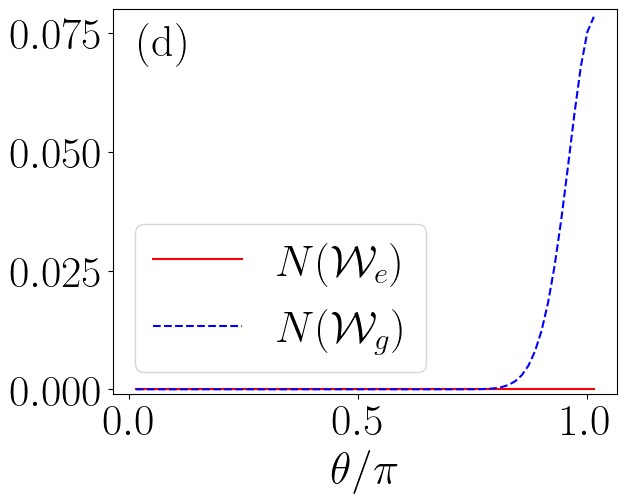

In [12]:
j=3
fig, axs = plt.subplots(1, 1, figsize = (6.5,5))
gs = gridspec.GridSpec(1,1)

axs.plot(theta_range/np.pi, WignerNegativityE_Modified, color = 'red', label = r'$N({\cal W}_e)$')
axs.plot(theta_range/np.pi, WignerNegativityG_Modified, '--' ,color = 'blue', label = r'$N({\cal W}_g$)')

axs.set_xlabel(r'$\theta/\pi$',fontsize = Font_Size)
axs.tick_params(axis='x', labelsize=Font_Size)
axs.tick_params(axis='y', labelsize=Font_Size)
axs.set_ylim([-10**-3,8*10**-2])
axs.annotate('('+alphabet[j]+')', xy=(0.05,0.88), xycoords= 'axes fraction',fontsize=Font_Size)

axs.legend(fontsize= Font_Size, loc = 'lower left')

plt.savefig(Plots_Path+'Fig2b.pdf',bbox_inches='tight')
plt.savefig(Plots_Path+'Fig2b.svg',bbox_inches='tight')
plt.show()

#### Zoomed

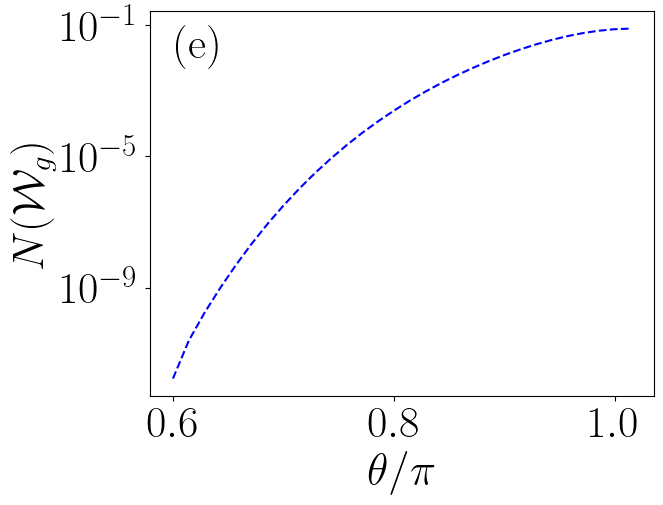

In [13]:
j=4
fig, axs = plt.subplots(1, 1, figsize = (6.5,5))
gs = gridspec.GridSpec(1,1)

#axs.plot(theta_range[41:62]/np.pi, WignerNegativityE_Modified[41:62],'--', color = 'orange', label = r'$N({\cal W}_{e})$')
axs.plot(theta_range[41:]/np.pi, WignerNegativityG_Modified[41:],'--', color = 'blue')

axs.set_xlabel(r'$\theta/\pi$',fontsize = Font_Size)
axs.set_ylabel(r'$N({\cal W}_{g}$)',fontsize = Font_Size)
axs.tick_params(axis='x', labelsize=Font_Size)
axs.tick_params(axis='y', labelsize=Font_Size)
axs.annotate('('+alphabet[j]+')', xy=(0.05,0.88), xycoords= 'axes fraction',fontsize=Font_Size)
#axs.legend(fontsize= Font_Size, loc = 'lower left')
axs.set_yscale('log')
#axs.set_xscale('log')

plt.savefig(Plots_Path+'Fig2bZoom.pdf',bbox_inches='tight')
plt.savefig(Plots_Path+'Fig2bZoom.svg',bbox_inches='tight')
plt.show()

## Appendix: showing they're similar

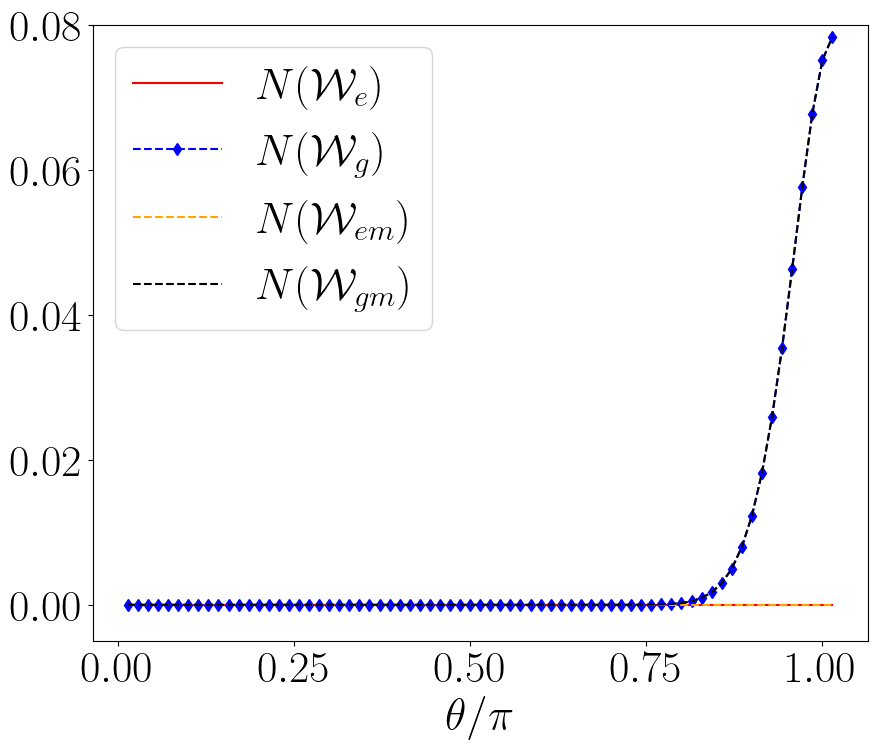

In [14]:
fig, axs = plt.subplots(1, 1, figsize = (10,8))
gs = gridspec.GridSpec(1,1)

axs.plot(theta_range/np.pi, WignerNegativityE_Usual, color = 'red', label = r'$N({\cal W}_e)$')
axs.plot(theta_range/np.pi, WignerNegativityG_Usual, '--', color = 'blue',marker = 'd', label = r'$N({\cal W}_g$)')

axs.plot(theta_range/np.pi, WignerNegativityE_Modified,'--', color = 'orange', label = r'$N({\cal W}_{em})$')
axs.plot(theta_range/np.pi, WignerNegativityG_Modified, '--', color = 'black', label = r'$N({\cal W}_{gm}$)')

axs.set_xlabel(r'$\theta/\pi$',fontsize = Font_Size)

axs.tick_params(axis='x', labelsize=Font_Size)
axs.tick_params(axis='y', labelsize=Font_Size)

axs.set_ylim([-5*10**-3,8*10**-2])

axs.legend(fontsize= Font_Size, loc = 'upper left')
plt.savefig(Plots_Path+'Fig2bAppendix.svg',bbox_inches='tight')
plt.show()

In [15]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman, Simon Cross and Asier Galicia.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.7.2
Numpy Version:      1.24.3
Scipy Version:      1.11.1
Cython Version:     None
Matplotlib Version: 3.7.1
Python Version:     3.11.3
Number of CPUs:     16
BLAS Info:          OPENBLAS
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Darwin (x86_64)
Installation path:  /Users/brunogoes/anaconda3/lib/python3.11/site-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily gen